Load the cleaned dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("technical_support_cleaned.csv")


Calculate ticket count by Type

In [ ]:
type_counts = df['Type'].value_counts()
type_counts


,count
Type,
Request,1688
Change,417
Incident,225


Plot Ticket Type Distribution (Bar Chart)

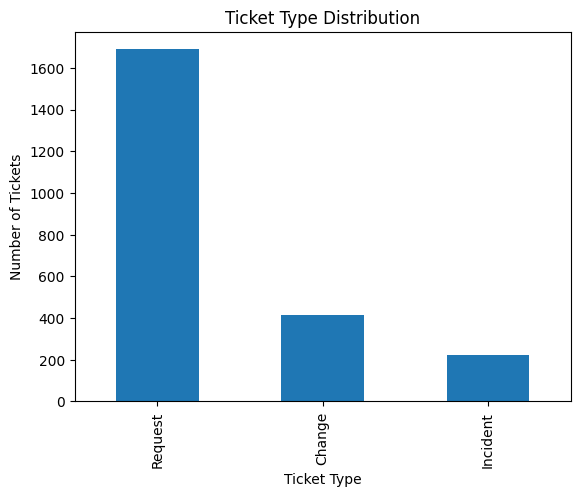

In [ ]:
plt.figure()
type_counts.plot(kind='bar')
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.title("Ticket Type Distribution")
plt.show()


Identify top categories and clusters by frequency


Count tickets per Category

In [ ]:
category_counts = df['category'].value_counts()
category_counts

,count
category,
Product setup,630
Pricing and licensing,457
Feature request,417
Purchasing and invoicing,264
Bug report,225
Other,203
Pricing and Licensing,68
Training request,66


Plot Top Categories (Bar Chart)

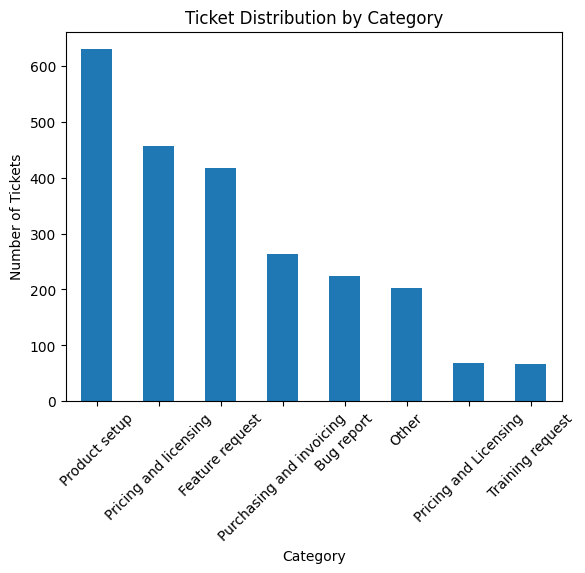

In [ ]:
plt.figure()
category_counts.plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.title("Ticket Distribution by Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
priority_counts = df['Priority'].value_counts()
priority_counts

,count
Priority,
Low,1192
Medium,722
High,416


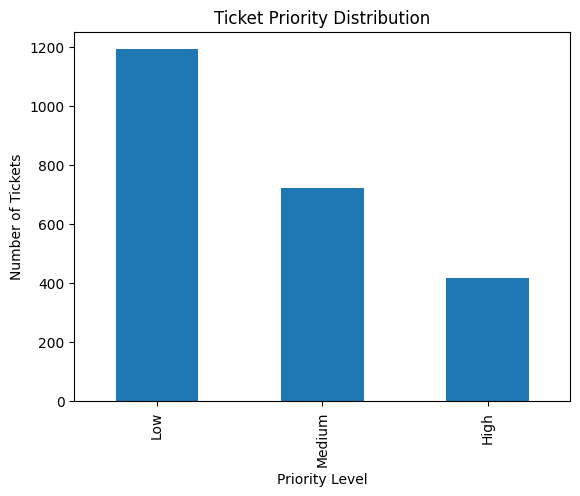

In [ ]:
plt.figure()
priority_counts.plot(kind='bar')
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")
plt.title("Ticket Priority Distribution")
plt.show()


In [ ]:
df.columns


Index(['Status', 'Ticket ID', 'Priority', 'Source', 'category', 'Agent Group',
       'Agent Name', 'Created time', 'Expected SLA to resolve',
       'Expected SLA to first response', 'First response time',
       'SLA For first response', 'Resolution time', 'SLA For Resolution',
       'Close time', 'Product group', 'Support Level', 'Country', 'Type',
       'Resolution_Duration', 'Priority_Score'],
      dtype='object')

Top Clusters by Frequency

Creating a Cluster Column

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv("technical_support_cleaned.csv")


Encode Text Columns

In [ ]:
le = LabelEncoder()

df['Category_Enc'] = le.fit_transform(df['category'])
df['Type_Enc'] = le.fit_transform(df['Type'])



Select Features for Clustering

In [ ]:
X = df[['Category_Enc', 'Type_Enc', 'Priority_Score']]


Apply K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df['Cluster'].value_counts()



,count
Cluster,
0,1077
1,804
2,449


What kind of tickets each cluster represents

In [ ]:
df.groupby('Cluster')[['category', 'Type']].agg(lambda x: x.mode()[0])


,category,Type
Cluster,,
0,Product setup,Request
1,Feature request,Change
2,Pricing and licensing,Request


Save Dataset with Cluster Column

In [ ]:
df.to_csv("technical_support_with_clusters.csv", index=False)


Plot Top Clusters by Frequency

In [ ]:
import matplotlib.pyplot as plt

cluster_counts = df['Cluster'].value_counts()
cluster_counts




,count
Cluster,
0,1077
1,804
2,449


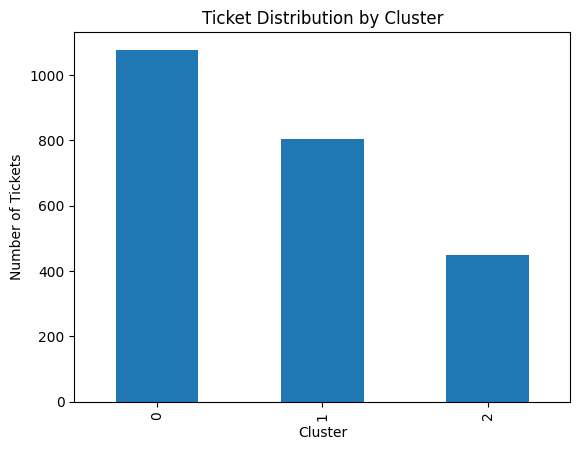

In [ ]:
plt.figure()
cluster_counts.plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Number of Tickets")
plt.title("Ticket Distribution by Cluster")
plt.show()


Plot Queue Distribution (Product Group)

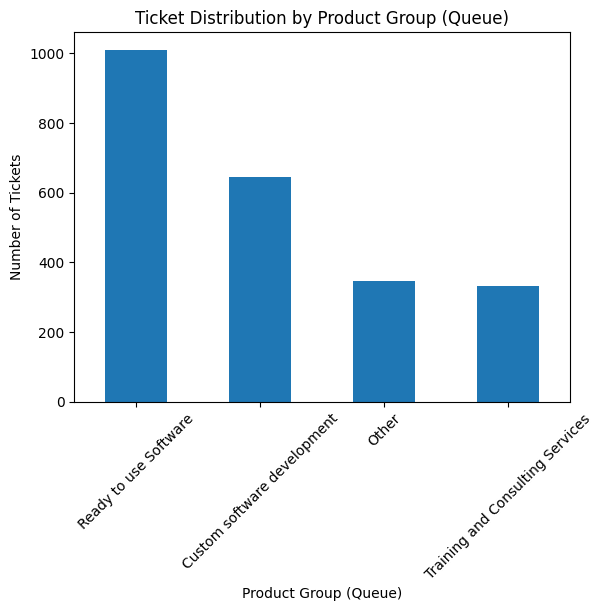

In [ ]:
queue_counts = df['Product group'].value_counts()

plt.figure()
queue_counts.plot(kind='bar')
plt.xlabel("Product Group (Queue)")
plt.ylabel("Number of Tickets")
plt.title("Ticket Distribution by Product Group (Queue)")
plt.xticks(rotation=45)
plt.show()


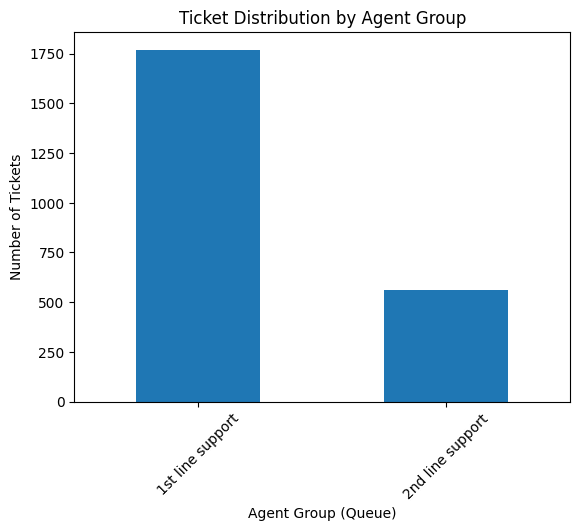

In [ ]:
agent_group_counts = df['Agent Group'].value_counts()
agent_group_counts

plt.figure()
agent_group_counts.plot(kind='bar')
plt.xlabel("Agent Group (Queue)")
plt.ylabel("Number of Tickets")
plt.title("Ticket Distribution by Agent Group")
plt.xticks(rotation=45)
plt.show()


Where the ticket is routed

Who is responsible for handling it

How workload is distributed

<Figure size 640x480 with 0 Axes>

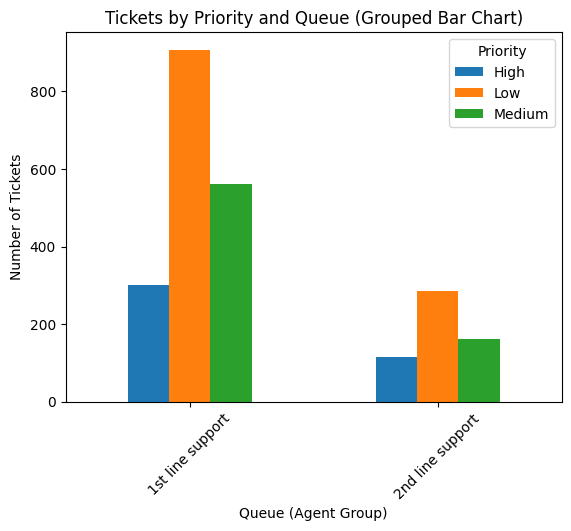

In [ ]:
priority_queue_table = pd.crosstab(df['Agent Group'], df['Priority'])
priority_queue_table

plt.figure()
priority_queue_table.plot(kind='bar')
plt.xlabel("Queue (Agent Group)")
plt.ylabel("Number of Tickets")
plt.title("Tickets by Priority and Queue (Grouped Bar Chart)")
plt.xticks(rotation=45)
plt.show()